<a href="https://colab.research.google.com/github/SpaceSapiens/Code-Explorer/blob/IITM_Course/Polynomial_regression_MLT_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Combine the linear regression units to form a single class

In [ ]:
#For proper rendering of latex in colab
from IPython.display import display,Math,Latex 

import numpy as np

#Import to generate plots
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
class LinReg(object):
  #X: Feature Matrix
  #w: weight vector
  #y: label vector

  def _init(self):
    self.t0=200
    self.t1=1000
  
  def predict(self,X:np.array):
    #Predict output label for the given input
    #Input: X
    #output: y

    y=X@self.w
    return y
  
  def loss(self,X:np.ndarray,y:np.ndarray)->float:
    #Calculate loss of a model based on the known labels
    e=y-self.predict(X)
    return (1/2)*(np.transpose(e)@e)
  
  def rmse(self,X:np.ndarray,y:np.ndarray)->float:
    #Calculate root mean squared error w.r.t actual label
    
    return np.sqrt((2/X.shape[0])*self.loss(X,y))
  
  def fit(self,X:np.ndarray,y:np.ndarray)->float:
    #Estimate the parameters of linear regression using normal equation
    self.w=np.linalg.pinv(X)@y
    return self.w
  
  def calculate_gradient(self,X:np.ndarray,y:np.ndarray)->float:
    #Calculate gradient w.r.t to weight vector on training set
    return np.transpose(X)@(self.predict(X)-y)
  
  def update_weights(self,grad:np.ndarray,lr:float)->np.ndarray:
    #Updates the weights based on the gradient
    return (self.w-lr*grad)
  
  def learning_schedule(self,t):
    return self.t0/(t+self.t1)

  def gd(self,X:np.ndarray,y:np.ndarray,num_epoch:int,lr:float)->np.ndarray:
    #Estimate parameters of linear regression through Gradient Descent
    self.w_all=[] #All weights across iterations
    self.err_all=[] #All errors across iterations

    #Initialize starting weight as [0,0]
    self.w=np.zeros((X.shape[1]))

    for i in np.arange(0,num_epoch):
      #Gradient
      dJdw=self.calculate_gradient(X,y)
      self.w_all.append(self.w)
      #Calculate loss
      self.err_all.append(self.loss(X,y))
      #Update Weight
      self.w=self.update_weight(dJdw,lr)     
    return self.w

  def mbgd(self,X:np.ndarray,y:np.ndarray,num_epoch:int,minibatch_size:int)->np.ndarray:
    #Estimate parameters of linear regression through Mini Batch Gradient Descent
    self.w_all=[] #All weights across iterations
    self.err_all=[] #All errors across iterations
    mini_batch_id=0   
    #Initialize starting weight as [0,0]
    self.w=np.zeros((X.shape[1]))  

    for epoch in range(num_epoch):
      #Selection of small number of examples
      #Shuffle indices to select random elements (MBGD)
      shuffled_indices=np.random.permutation(X.shape[0])
      X_shuffled=X[shuffled_indices]
      y_shuffled=y[shuffled_indices]
      for i in range(0,X.shape[0],minibatch_size):
        mini_batch_id+=1
        Xi=X_shuffled[i:i+minibatch_size]
        yi=y_shuffled[i:i+minibatch_size]
        
        self.w_all.append(self.w)
        #calculate error
        self.err_all.append(self.loss(Xi,yi))
        #Gradient Calculation
        dJdw=2/minibatch_size*self.calculate_gradient(Xi,yi)
        
        self.w=self.update_weight(dJdw,self.learning_schedule(mini_batch_id))     

    return self.w
  def sgd(self,X:np.ndarray,y:np.ndarray,num_epochs:int)->np.ndarray:
    self.w_all=[] #All parameters across epochs
    self.err_all=[] #Respective errors

    #Parameter vector initialized to 0
    w=np.zeros((X.shape[1]))
    for epoch in range(num_epochs):
      for i in range(X.shape[0]):
        random_index=np.random.randint(X.shape[0])
        xi=X[random_index:random_index+1]
        yi=y[random_index:random_index+1]

        self.w_all.append(self.w)
        self.err_all.append(self.loss(xi,yi))
        gradients=2*self.calculate_gradient(xi,yi)
        lr=self.learning_schedule(epoch*X.shape[0]+i)
        self.w=self.update_weight(gradients,lr)      

    return self.w




---
⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡
# **WEEK3**








# **Polynomial Regression**

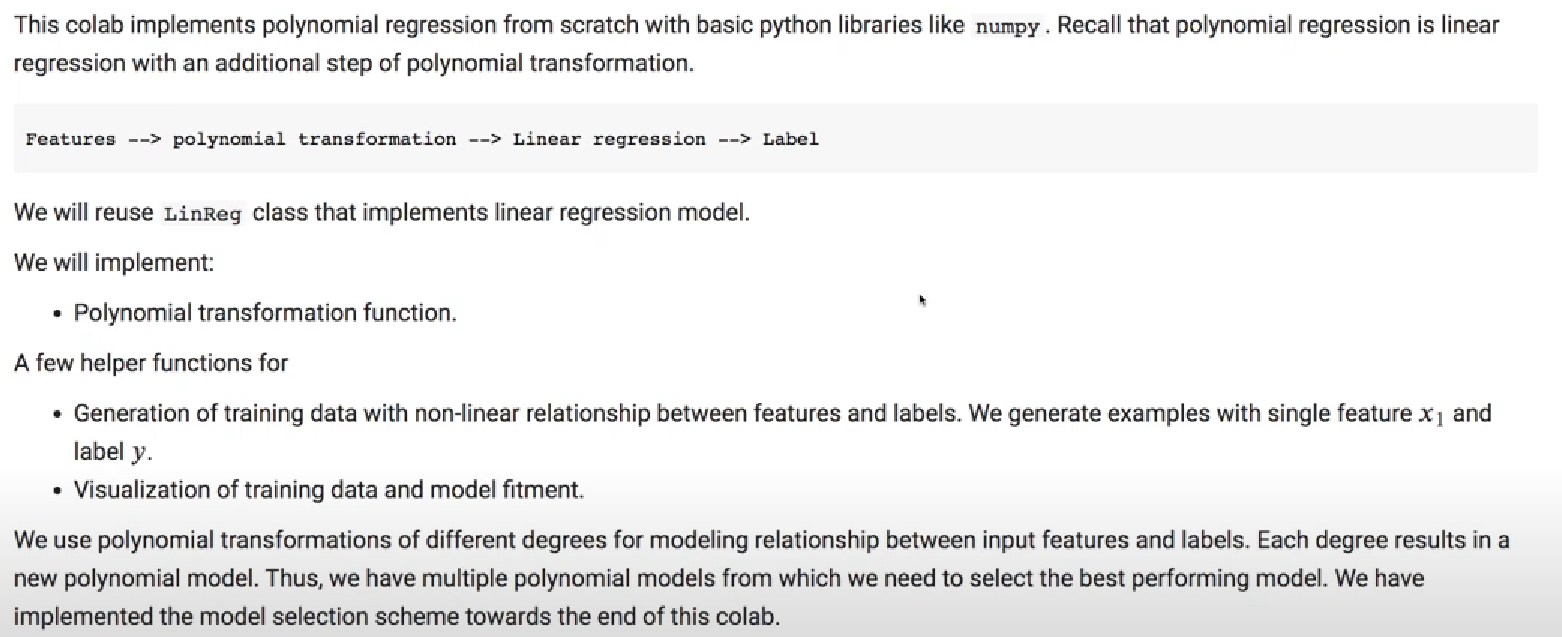

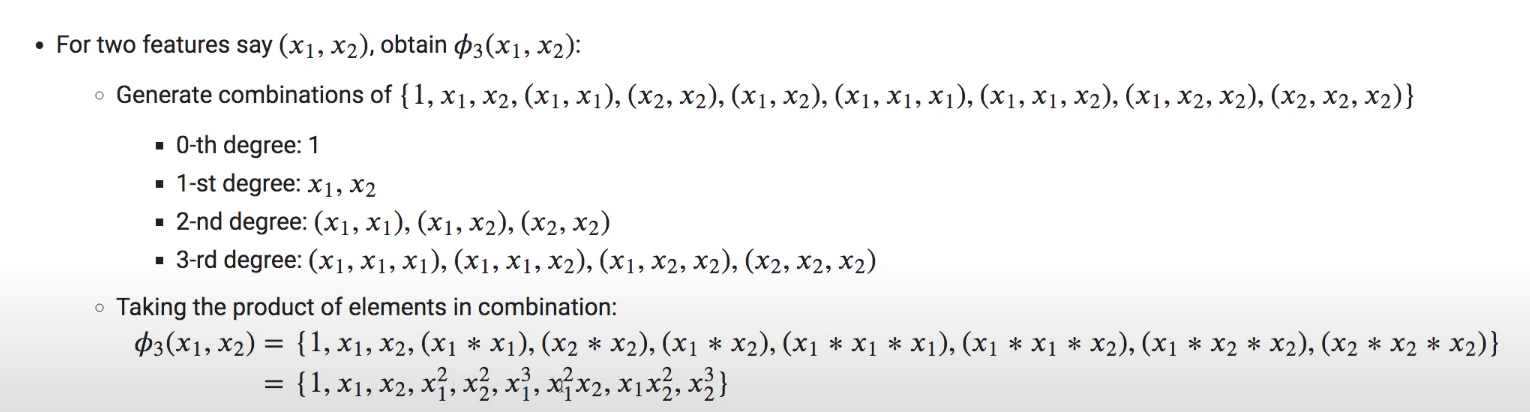

In [ ]:
#Write a function to get the combination of polynomial elements
import itertools
import functools
def get_combinations(X,degree):
  return itertools.combinations_with_replacement(X,degree)

In [ ]:
#Write function to compute new features
#if item = [1,2,3,4,5] function returns (((1*2)*3)*4)*5
def compute_new_feature(items):
  return functools.reduce(lambda x,y:x*y,items)

In [ ]:
#Check the generated functions
#Feature =1 degree=3
{items:compute_new_feature(items)for items in get_combinations([1],3)}

{(1, 1, 1): 1}

In [ ]:
#Feature =2 degree=3
{items:compute_new_feature(items)for items in get_combinations([2,3],3)}

{(2, 2, 2): 8, (2, 2, 3): 12, (2, 3, 3): 18, (3, 3, 3): 27}

In [ ]:
#Feature =2 degree=4
{items:compute_new_feature(items)for items in get_combinations([2,3],4)}

{(2, 2, 2, 2): 16,
 (2, 2, 2, 3): 24,
 (2, 2, 3, 3): 36,
 (2, 3, 3, 3): 54,
 (3, 3, 3, 3): 81}

Polynomial Transform Function

In [ ]:
import numpy as np
import itertools
import functools
#Create the function
def polynomial_transform(x,degree,logging=False):
  #Convert to feature matrix
  if(x.ndim==1):
    x=x[:,None]
  #Transpose the feature matrix
  x_t=x.transpose() 
  #Populate all 1s as first feature
  features=[np.ones(len(x))]

  if logging:
    print("Input: ",x)
  #Generate combination for all degrees
  for current_degree in range(1,degree+1):
    #Combine features into a new feature
    for items in get_combinations(x_t,current_degree):
      features.append(compute_new_feature(items))
      if logging:
        print(items," : ",compute_new_feature(items))
  if logging:
    print(np.asarray(features).transpose())
  #Return the new feature array
  return np.asarray(features).transpose()


In [ ]:
#Test the polynomial transformation
#Feature=1, degree=3
polynomial_transform(np.array([2]),3,True)

Input:  [[2]]
(array([2]),)  :  [2]
(array([2]), array([2]))  :  [4]
(array([2]), array([2]), array([2]))  :  [8]
[[1. 2. 4. 8.]]


array([[1., 2., 4., 8.]])

In [ ]:
#Feature=2, degree=2
#2 examples of single feature each, at 2 degree
polynomial_transform(np.array([2,3]),2,True)

Input:  [[2]
 [3]]
(array([2, 3]),)  :  [2 3]
(array([2, 3]), array([2, 3]))  :  [4 9]
[[1. 2. 4.]
 [1. 3. 9.]]


array([[1., 2., 4.],
       [1., 3., 9.]])

In [ ]:
#2 examples of 2 feature each, at 2 degree
polynomial_transform(np.array([[2,3],[4,5]]),2,True)

Input:  [[2 3]
 [4 5]]
(array([2, 4]),)  :  [2 4]
(array([3, 5]),)  :  [3 5]
(array([2, 4]), array([2, 4]))  :  [ 4 16]
(array([2, 4]), array([3, 5]))  :  [ 6 20]
(array([3, 5]), array([3, 5]))  :  [ 9 25]
[[ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]


array([[ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [ ]:
#2 examples of 2 feature each, at 3 degree
#Examples = [2,3] and [4,5]
polynomial_transform(np.array([[2,3],[4,5]]),3,True)

Input:  [[2 3]
 [4 5]]
(array([2, 4]),)  :  [2 4]
(array([3, 5]),)  :  [3 5]
(array([2, 4]), array([2, 4]))  :  [ 4 16]
(array([2, 4]), array([3, 5]))  :  [ 6 20]
(array([3, 5]), array([3, 5]))  :  [ 9 25]
(array([2, 4]), array([2, 4]), array([2, 4]))  :  [ 8 64]
(array([2, 4]), array([2, 4]), array([3, 5]))  :  [12 80]
(array([2, 4]), array([3, 5]), array([3, 5]))  :  [ 18 100]
(array([3, 5]), array([3, 5]), array([3, 5]))  :  [ 27 125]
[[  1.   2.   3.   4.   6.   9.   8.  12.  18.  27.]
 [  1.   4.   5.  16.  20.  25.  64.  80. 100. 125.]]


array([[  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

In [ ]:
polynomial_transform(np.array([2]),0,True)

Input:  [[2]]
[[1.]]


array([[1.]])

# Non Linear Data Generation

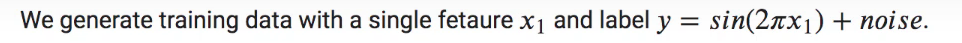

In [ ]:
def create_nonlin_training_set(func,sample_size,std):
  #Sample X within 0,1 with desired number of samples
  x=np.linspace(0,1,sample_size)
  #this will calculate the y based on a function we are passing for every x
  #Adding gaussian noise with the calculated data
  y=func(x)+np.random.normal(scale=std,size=x.shape)
  return x,y

def nonlin(x):
  #Define the function for y in terms of x
  return 2*np.sin(2*np.pi*x)

# Visualization Code

In [ ]:
#Function to visualize the data
#For training data
def visualize_training_data(X_train,y_train):
  points=np.linspace(0,1,100)
  output=nonlin(points)

  plt.scatter(X_train,y_train,facecolor="none",edgecolor="b",s=50,label="training_data")
  plt.plot(points,output,c="g", label="$\sin(2\pi x)$")
  plt.xlabel("$x_1$")
  plt.ylabel("y")
  plt.legend()
  plt.show()
#For model fit
def visualize_model_fit(X,y,lin_reg,degree):
  points=np.linspace(0,1,100)
  output=nonlin(points)

  if(degree>0):
    plt.scatter(X,y,facecolor="none",edgecolor="b",s=50,label="training_data")
  plt.plot(points,output,c="g", label="$\sin(2\pi x)$")

  y_hat=lin_reg.predict(polynomial_transform(points,degree,False))
  plt.plot(points,y_hat,c="r",label="$h_\mathbf{w}(x)$")
  plt.xlabel("$x_1$")
  plt.ylabel("y")
  #plt.ylim(-1.5,1.5)
  plt.title("M={}".format(degree))#, xy=(-0.15,1)



Cell to change the number of samples

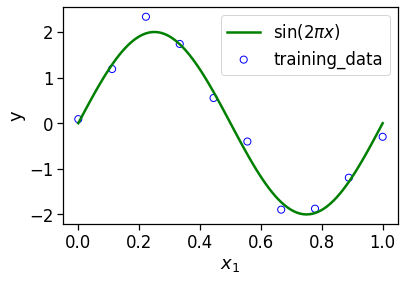

In [ ]:
#Check the function using 10 samples and std = 0.2
num_samples=10
X,y=create_nonlin_training_set(nonlin,num_samples,0.2)
visualize_training_data(X,y)

Now fit a polynomial regression model on this data

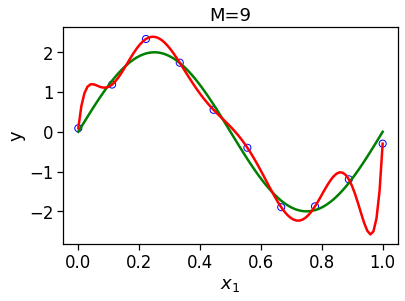

In [ ]:
#Set the degree
degree=9
X_transform=polynomial_transform(X,degree)
lin_reg=LinReg()
lin_reg.fit(X_transform,y)
visualize_model_fit(X,y,lin_reg,degree)

Try polynonimal regression for different degrees

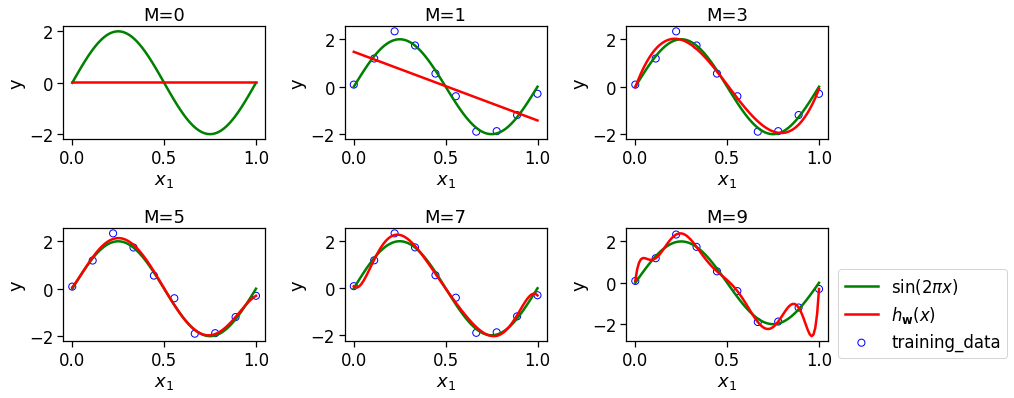

In [ ]:
f=plt.figure(figsize=(12,8))
sns.set_context("notebook",font_scale=1.5, rc={"lines.linewidth":2.5})
for i,degree in enumerate([0,1,3,5,7,9]):
  plt.subplot(3,3,i+1)
  X_transform=polynomial_transform(X,degree)
  lin_reg=LinReg()
  lin_reg.fit(X_transform,y)
  visualize_model_fit(X,y,lin_reg,degree)
f.tight_layout()
plt.legend(bbox_to_anchor=(1.05,0.64),loc=2,borderaxespad=0.)
plt.show()

# Model Selection

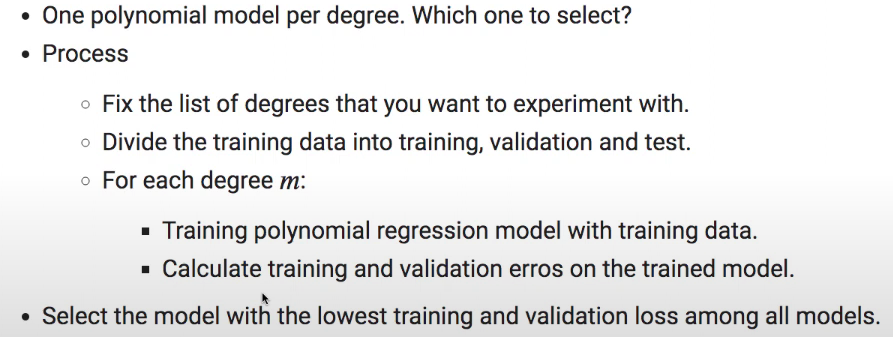

In [ ]:
#@title [Model Selection helper]
import pandas as pd

#Function to converst weight dictionary into a data frame for verification
def convert_dict_df(w_dict,degree):
  poly_w_dict={i:np.array(np.zeros(degree))for i in range(degree)}
  for deg in poly_w_dict:
    weight_vec=w_dict[deg]
    for i in range(len(weight_vec)):
      poly_w_dict[deg][i]=weight_vec[i]
  poly_w_df=pd.DataFrame(poly_w_dict)
  poly_w_df.columns=['w_'+str(1)for i in range(degree)]
  return poly_w_df

def plot_model_selection(training_errors,val_errors):
  plt.plot(training_errors,'o-',mfc="none",mec="b",ms=10)
  plt.plot(val_errors,'o-',mfc='none',mec='r',ms=10)
  plt.legend()
  plt.xlabel("degree")
  plt.ylabel("RMSE")
  plt.show()

No handles with labels found to put in legend.


[1.3773475992209077, 1.021738488149346, 1.020455289245516, 0.26710319750213163, 0.2615461166097881, 0.15101058257047023, 0.14920197797650064, 0.1207023196355262, 0.07808094274404803, 7.813325336663631e-11]


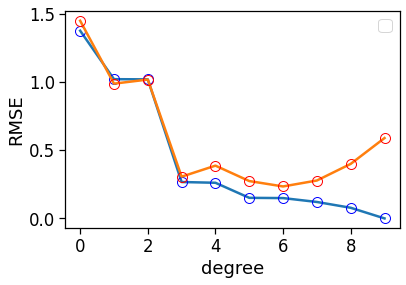

,w_1,w_1,w_1,w_1,w_1,w_1,w_1,w_1,w_1,w_1
0,0.02387,1.470958,1.386419,-0.025755,-0.083445,0.061632,0.070237,0.084851,0.090294,0.089174
1,0.00000,-2.894176,-2.323534,20.926898,23.090254,9.873795,7.577632,-8.226808,-47.178982,69.721392
2,0.00000,0.000000,-0.570642,-61.848895,-72.773841,37.393539,65.721919,326.507545,1112.033937,-1588.161065
3,0.00000,0.000000,0.000000,40.852169,58.375351,-253.031112,-374.959116,-1921.447668,-7846.342963,16475.306377
4,0.00000,0.000000,0.000000,0.000000,-8.761591,348.180722,583.803650,4956.594400,27307.934558,-86951.931596
5,0.00000,0.000000,0.000000,0.000000,0.000000,-142.776925,-352.367636,-6729.171031,-53262.513057,258023.802819
6,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,69.863570,4697.550665,58986.449696,-450726.041670
7,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1322.196313,-34560.297760,459829.159703
8,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8309.525362,-253258.462442
9,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58126.219512


In [ ]:
training_errors=[]
val_errors=[]
w_dict={}

X_val=np.linspace(0,1,100)
y_val=nonlin(X_val)

#Iterate through dgrees 0 to 10
for i in range(10):
  X_transform=polynomial_transform(X,i)
  X_val_transform=polynomial_transform(X_val,i)
  lin_reg=LinReg()
  lin_reg.fit(X_transform,y)
  
  #Copy weights of linear regression model into the weight dictionary
  w_dict[i]=lin_reg.w
  #Update training error into the list
  training_errors.append(lin_reg.rmse(X_transform,y)) 
  #Update validation error into the list
  val_errors.append(lin_reg.rmse(X_val_transform,y_val+np.random.normal(scale=0.25,size=len(y_val))))
print(training_errors)
plot_model_selection(training_errors,val_errors)
convert_dict_df(w_dict,10)

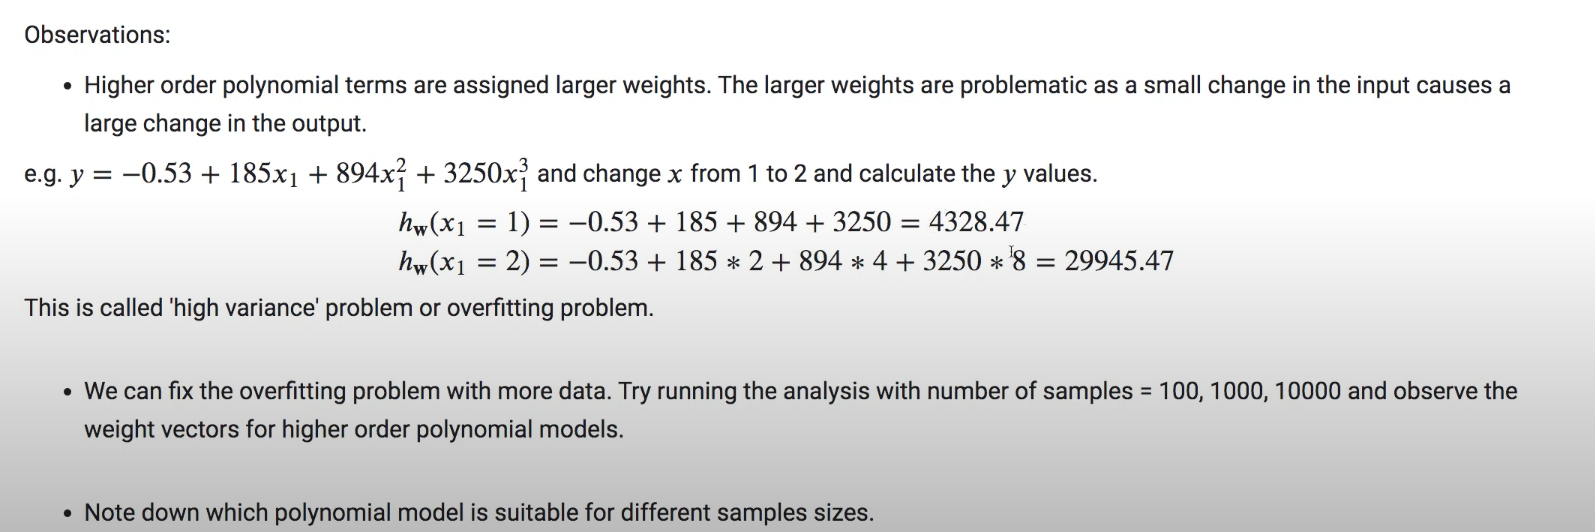

# Overfitting Solution 1:
Using more Data

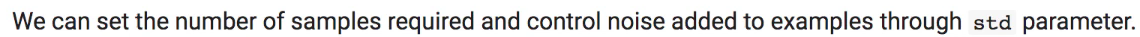

To do this change the num of samples and evaluate for various iterations

https://colab.research.google.com/drive/17PYDxTiKsjhGzd5OEhg3IzGmijWukwAw#scrollTo=GrKVNb47QpAa&line=1&uniqifier=1


#Overfitting Solution 2:
Using regression

# Ridge and Lasso Regression

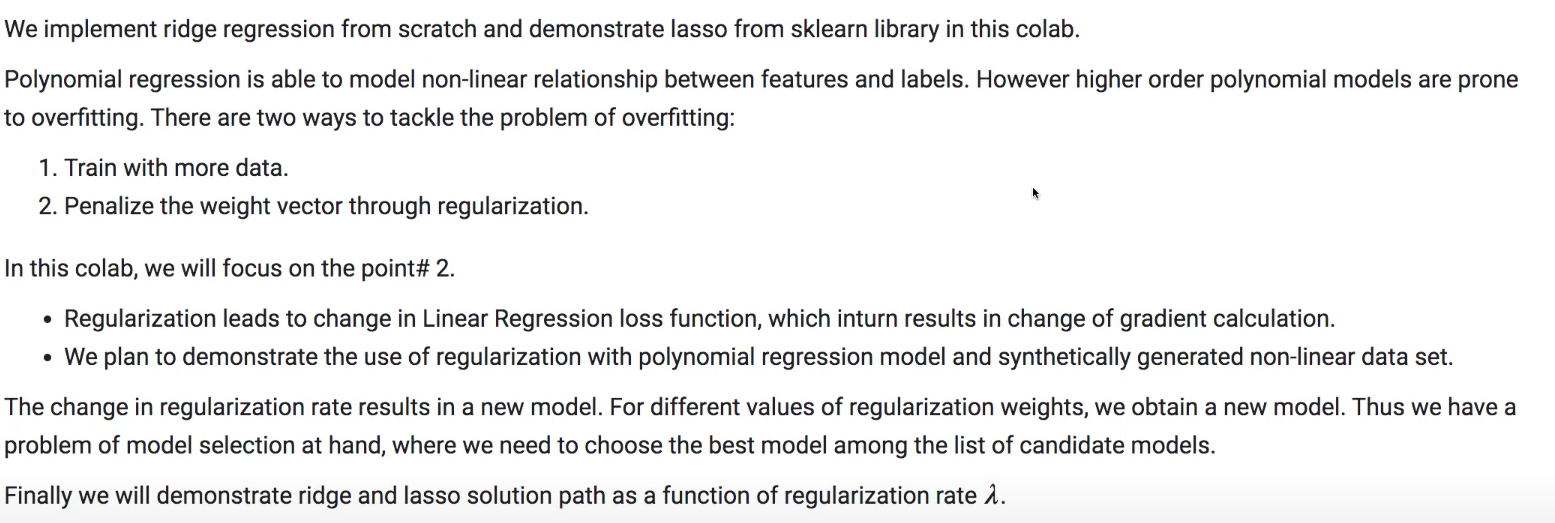

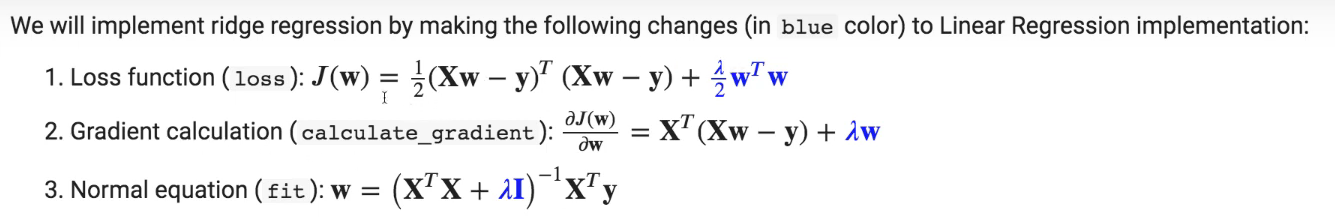

In [ ]:
#@title: [LinReg_withRegularization]
class LinReg_withRegularization(object):
  #X: Feature Matrix
  #w: weight vector
  #y: label vector

  def _init(self):
    self.t0=20
    self.t1=100
  
  def predict(self,X:np.array):
    #Predict output label for the given input
    #Input: X
    #output: y

    y=X@self.w
    return y

  '''
  Changed for Regularization
  '''
  def loss(self,X:np.ndarray,y:np.ndarray,reg_rate:float)->float:
    #Calculate loss of a model based on the known labels
    e=y-self.predict(X)
    #return (1/2)*(np.transpose(e)@e)
    return (1/2)*(np.transpose(e)@e)+(reg_rate/2)*np.transpose(self.w)@self.w
  
  def rmse(self,X:np.ndarray,y:np.ndarray)->float:
    #Calculate root mean squared error w.r.t actual label
    
    return np.sqrt((2/X.shape[0])*self.loss(X,y))

  '''
  Changed for Regularization
  '''
  def fit(self,X:np.ndarray,y:np.ndarray,reg_rate:float)->float:
    #Estimate the parameters of linear regression using normal equation
    self.w=np.zeros((X.shape[1]))
    #eye=Identity matrix
    eye=np.eye(np.size(X,1))
    #self.w=np.linalg.pinv(X)@y
    self.w=np.linalg.solve(reg_rate*eye+X.T@X,X.T@y,)
    return self.w

  '''
  Changed for Regularization
  '''
  def calculate_gradient(self,X:np.ndarray,y:np.ndarray,reg_rate:float)->float:
    #Calculate gradient w.r.t to weight vector on training set
    return np.transpose(X)@(self.predict(X)-y)+reg_rate*self.w
  
  def update_weights(self,grad:np.ndarray,lr:float)->np.ndarray:
    #Updates the weights based on the gradient
    return (self.w-lr*grad)
  
  def learning_schedule(self,t):
    return self.t0/(t+self.t1)
  
  '''
  Changed for Regularization
  '''
  def gd(self,X:np.ndarray,y:np.ndarray,num_epoch:int,lr:float,reg_rate:float)->np.ndarray:
    #Estimate parameters of linear regression through Gradient Descent
    self.w_all=[] #All weights across iterations
    self.err_all=[] #All errors across iterations

    #Initialize starting weight as [0,0]
    self.w=np.zeros((X.shape[1]))

    for i in np.arange(0,num_epoch):
      #Gradient
      dJdw=self.calculate_gradient(X,y,reg_rate)
      self.w_all.append(self.w)
      #Calculate loss
      self.err_all.append(self.loss(X,y,0))
      #Update Weight
      self.w=self.update_weight(dJdw,lr)     
    return self.w
  '''
  Changed for Regularization
  '''
  def mbgd(self,X:np.ndarray,y:np.ndarray,num_epoch:int,minibatch_size:int)->np.ndarray:
    #Estimate parameters of linear regression through Mini Batch Gradient Descent
    self.w_all=[] #All weights across iterations
    self.err_all=[] #All errors across iterations
    mini_batch_id=0   
    #Initialize starting weight as [0,0]
    self.w=np.zeros((X.shape[1]))  

    for epoch in range(num_epoch):
      #Selection of small number of examples
      #Shuffle indices to select random elements (MBGD)
      shuffled_indices=np.random.permutation(X.shape[0])
      X_shuffled=X[shuffled_indices]
      y_shuffled=y[shuffled_indices]
      for i in range(0,X.shape[0],minibatch_size):
        mini_batch_id+=1
        Xi=X_shuffled[i:i+minibatch_size]
        yi=y_shuffled[i:i+minibatch_size]
        
        self.w_all.append(self.w)
        #calculate error
        self.err_all.append(self.loss(Xi,yi,0))
        #Gradient Calculation
        dJdw=2/minibatch_size*self.calculate_gradient(Xi,yi,reg_rate)
        
        self.w=self.update_weight(dJdw,self.learning_schedule(mini_batch_id))     

    return self.w
  '''
  Changed for Regularization
  '''
  def sgd(self,X:np.ndarray,y:np.ndarray,num_epochs:int)->np.ndarray:
    self.w_all=[] #All parameters across epochs
    self.err_all=[] #Respective errors

    #Parameter vector initialized to 0
    w=np.zeros((X.shape[1]))
    for epoch in range(num_epochs):
      for i in range(X.shape[0]):
        random_index=np.random.randint(X.shape[0])
        xi=X[random_index:random_index+1]
        yi=y[random_index:random_index+1]

        self.w_all.append(self.w)
        self.err_all.append(self.loss(xi,yi,0))
        gradients=2*self.calculate_gradient(xi,yi,reg_rate)
        lr=self.learning_schedule(epoch*X.shape[0]+i)
        self.w=self.update_weight(gradients,lr)      

    return self.w


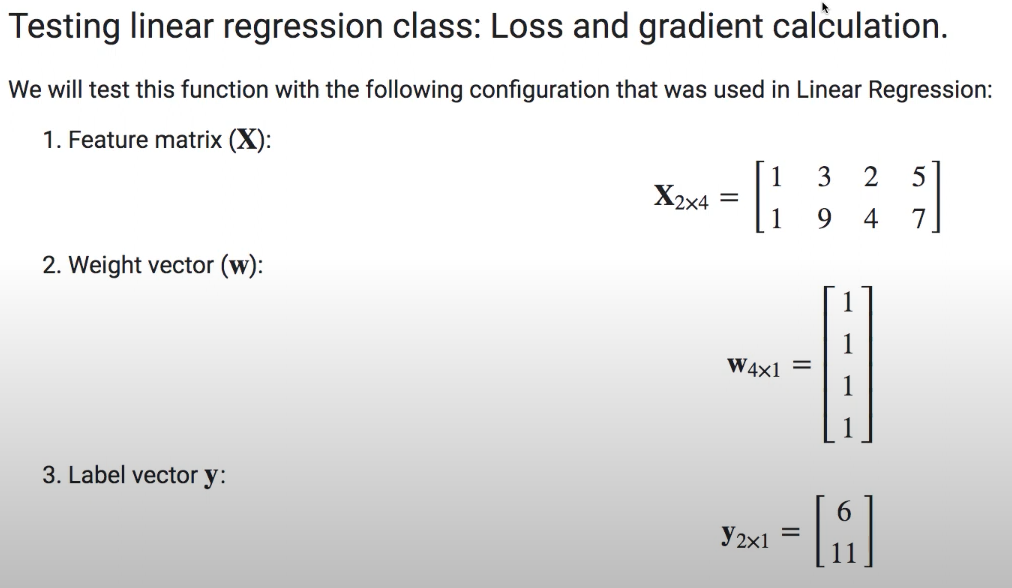

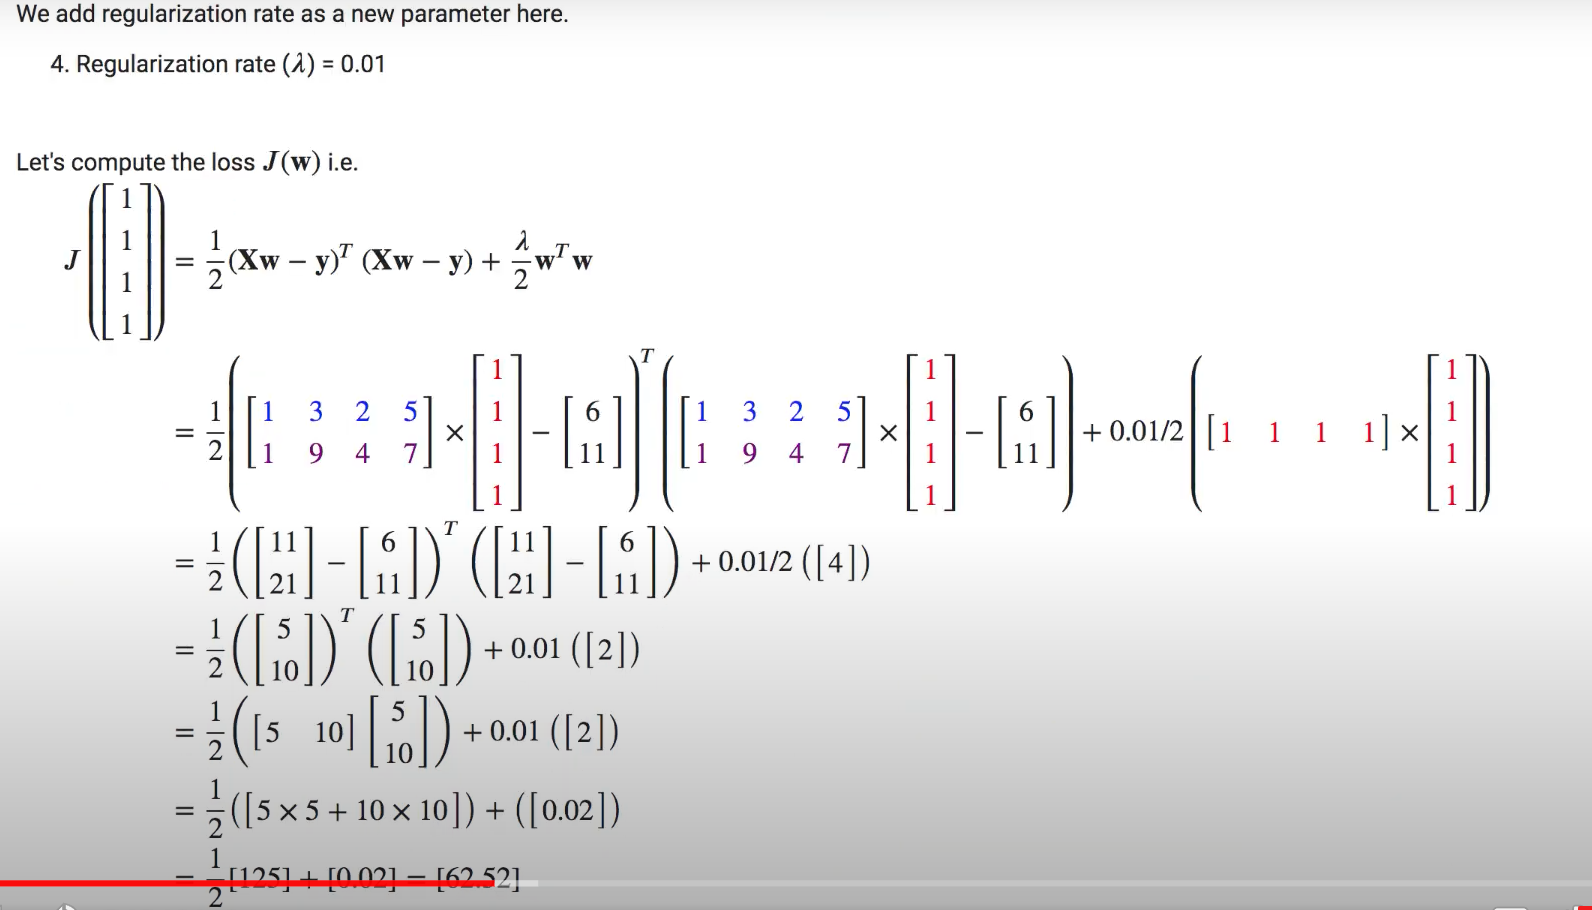

In [ ]:
#Test the function using predefined matrix
import unittest
class TestLossFunction(unittest.TestCase):
  def test_loss_function(self):
    #Initialize
    feature_matrix=np.array([[1,3,2,5],[1,9,4,7]])
    weight_vector=np.array([1,1,1,1])
    label_vector=np.array([6,11])
    reg_rate=0.01
    expected_loss=np.array([62.52])

    #Call
    lin_reg=LinReg_withRegularization()
    lin_reg.w=weight_vector
    loss_value=lin_reg.loss(feature_matrix,label_vector,reg_rate)

    #Assert
    #Shape
    self.assertEqual(loss_value.shape,())

    #Content
    np.testing.assert_array_almost_equal(loss_value,expected_loss)

unittest.main(argv=[''],defaultTest="TestLossFunction",verbosity=2,exit=False)

test_loss_function (__main__.TestLossFunction) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.010s

OK


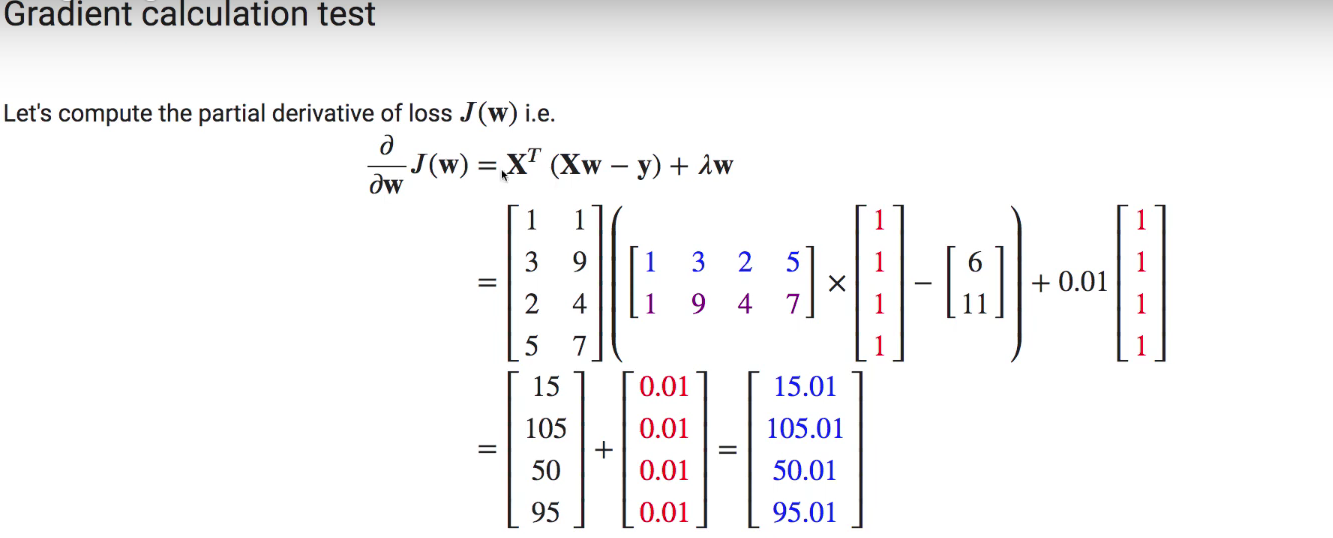

In [ ]:
#Test the function suing predefined matrix
class TestCalculateGradient(unittest.TestCase):
  def test_calculate_gradient(self):
    #Initialize
    feature_matrix=np.array([[1,3,2,5],[1,9,4,7]])
    weight_vector=np.array([1,1,1,1])
    label_vector=np.array([6,11])
    reg_rate=0.01
    expected_gradient=np.array([15.01,105.01,50.01,95.01])

    #Call
    lin_reg=LinReg_withRegularization()
    lin_reg.w=weight_vector    
    grad=lin_reg.calculate_gradient(feature_matrix,label_vector,reg_rate)

    #Assert
    #Shape
    self.assertEqual(grad.shape,(4,))

    #Content
    np.testing.assert_array_almost_equal(grad,expected_gradient,decimal=0)

unittest.main(argv=[''],defaultTest="TestCalculateGradient",verbosity=2,exit=False)


test_calculate_gradient (__main__.TestCalculateGradient) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


In [ ]:
#For model fit
def visualize_model_fit_with_regularization(X,y,lin_reg,degree,reg_rate):
  points=np.linspace(0,1,100)
  output=nonlin(points)

  if(degree>0):
    plt.scatter(X,y,facecolor="none",edgecolor="b",s=50,label="training_data")
  plt.plot(points,output,c="g", label="$\sin(2\pi x)$")

  y_hat=lin_reg.predict(polynomial_transform(points,degree,False))
  plt.plot(points,y_hat,c="r",label="$h_\mathbf{w}(x)$")
  plt.xlabel("$x_1$")
  plt.ylabel("y")
  #plt.ylim(-1.5,1.5)
  plt.title("M={m},RegRate={rate}".format(m=degree,rate=reg_rate))
  #, xy=(-0.15,1)



#Ridge Regression for fixing overfitting in polynomial regression

#Ridge Regression

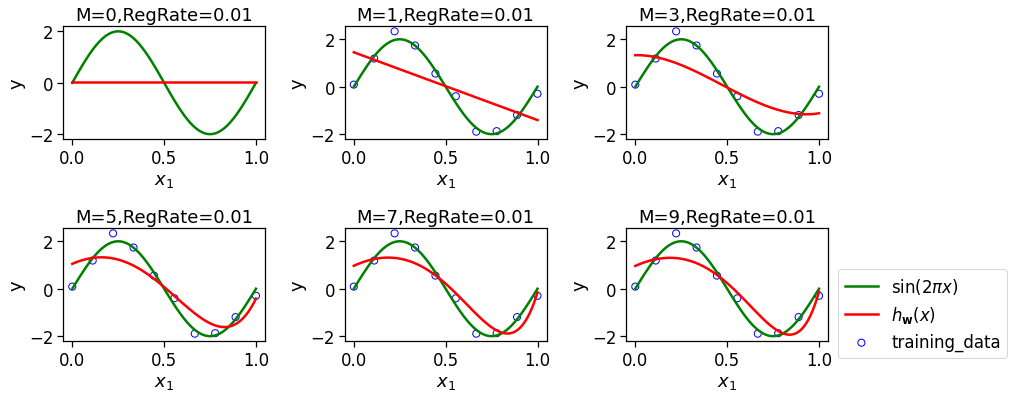

In [ ]:
#For different Degrees the fitting will be like this
f=plt.figure(figsize=(12,8))
reg_rate=0.01
sns.set_context("notebook",font_scale=1.5, rc={"lines.linewidth":2.5})
for i,degree in enumerate([0,1,3,5,7,9]):
  plt.subplot(3,3,i+1)
  X_transform=polynomial_transform(X,degree)
  lin_reg=LinReg_withRegularization()
  lin_reg.fit(X_transform,y,reg_rate)
  visualize_model_fit_with_regularization(X,y,lin_reg,degree,reg_rate)
f.tight_layout()
plt.legend(bbox_to_anchor=(1.05,0.64),loc=2,borderaxespad=0.)
plt.show()

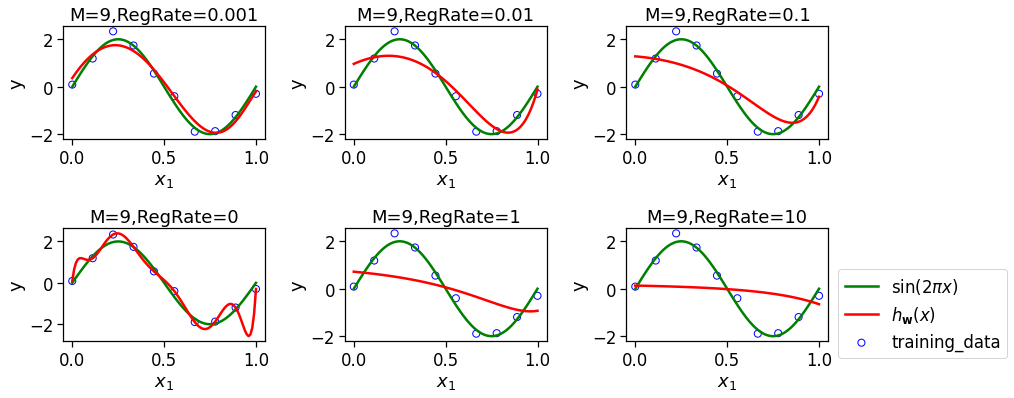

In [ ]:
#For different Regularization rate the fitting will be like this
f=plt.figure(figsize=(12,8))
degree=9
sns.set_context("notebook",font_scale=1.5, rc={"lines.linewidth":2.5})
for i,reg_rate in enumerate([1e-3,1e-2,1e-1,0,1,10]):
  plt.subplot(3,3,i+1)
  X_transform=polynomial_transform(X,degree)
  lin_reg=LinReg_withRegularization()
  lin_reg.fit(X_transform,y,reg_rate)
  visualize_model_fit_with_regularization(X,y,lin_reg,degree,reg_rate)
f.tight_layout()
plt.legend(bbox_to_anchor=(1.05,0.64),loc=2,borderaxespad=0.)
plt.show()

#Lasso Regression

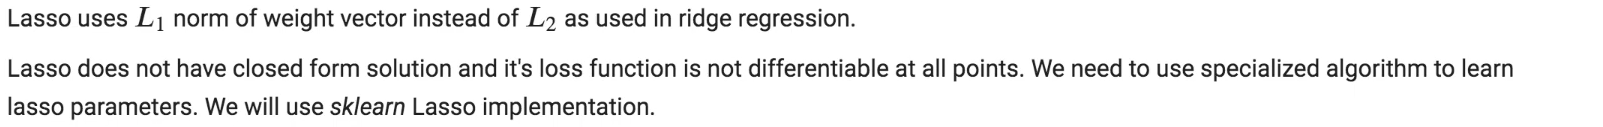

In [ ]:
from sklearn.linear_model import Lasso

#Lasso
#Set regularization rate
reg_rate=0.01
lasso=Lasso(alpha=reg_rate)
lasso.fit(X_transform,y)

#Linear regression to compare with the lasso model
lin_reg=LinReg_withRegularization()
_=lin_reg.fit(X_transform,y,0)

Compare Linear regression and Lasso Regression weight vectors

In [ ]:
pd.DataFrame({'LinReg': lin_reg.w,'Ridge': lin_reg.w_df[0.01],'Lasso': lasso.coef_})

,LinReg,Lasso
0,0.089174,0.000000
1,69.721392,0.287328
2,-1588.161065,-5.829024
3,16475.306377,-0.000000
4,-86951.931596,-0.000000
5,258023.802819,0.000000
6,-450726.041670,0.000000
7,459829.159703,0.000000
8,-253258.462442,0.000000
9,58126.219512,3.886300
